In [1]:
import torch
import imageio
import gradoptics as optics
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /var/folders/tg/2_q32n3x5q75j4ytd6n3kmvh0000gp/T/matplotlib-kcylcqgr because the default path (/Users/stanford/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


# Beautiful GIF

In [2]:
# Creating a scene
f = 0.05
m = 0.15
lens = optics.PerfectLens(f=f, na=1 / 1.4, position=[0., 0., 0.], m=m)
sensor = optics.Sensor(position=(-f * (1 + m), 0, 0))
atom_cloud = optics.AtomCloud(n=int(1e6), f=2, position=[f * (1 + m) / m, 0., 0.], phi=0.1)
light_source = optics.LightSourceFromDistribution(atom_cloud)
scene = optics.Scene(light_source)
scene.add_object(lens)
scene.add_object(sensor)

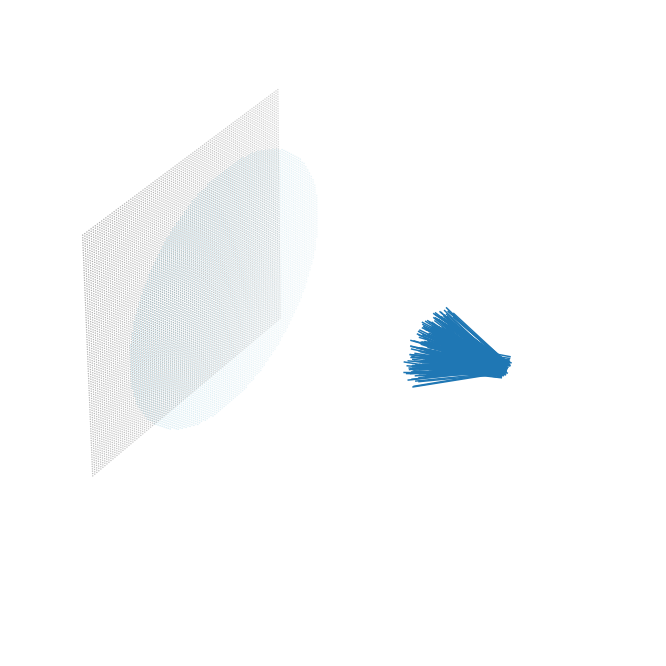

In [3]:
# Selecting a batch of rays that make it to the lens
rays = light_source.sample_rays(500_000)
t = lens.get_ray_intersection(rays)
mask = ~torch.isnan(t)
rays = rays[mask]
t = t[mask]

# Plotting the rays at t = 0.1 second
fig = plt.figure(figsize=(12, 12))
ax = fig.gca(projection='3d')
scene.plot(ax)
rays.plot(ax, [0.1 for _ in range(t.shape[0])], c='C0')
ax.set_axis_off()

In [4]:
# Interpolating t between 0 and t_max using 50 interpolation steps
for t_ in torch.linspace(0, 1, 50):
    
    # Plotting the rays at time t_, and saving the image
    fig = plt.figure(figsize=(12, 12))
    ax = fig.gca(projection='3d')
    scene.plot(ax)
    rays.plot(ax, t_ * t, c='C0')
    ax.set_axis_off()
    plt.savefig(f'rays_time_{t_}.png')
    plt.close()

In [5]:
# Producing the gif
images = []
for t_ in torch.linspace(0, 1, 50):
    images.append(imageio.imread(f'rays_time_{t_}.png'))
imageio.mimsave('movie.gif', images)

![SegmentLocal](movie.gif "segment")

!rm -r *.png